In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
# from tqdm.auto import tqdm
from IPython.display import clear_output

In [26]:
# without numba this is very slow
@jit(nopython=True) 
def count_arround(field):
    
    results_list = []
    neighbor_count = []
    rows,cols = field.shape
    search_area = [-1,0,1]
    row_count = 0
    for row in field:
        cell_count = 0
        
        for cell in row:
#             start count at -1 as each pixel coutns itself as a neighbor
            neighbors = 0
            for relative_row_pos in search_area:
                abs_row = row_count+relative_row_pos
#                 if -1 < abs_row < rows:
                if abs_row == -1:
                    abs_row = rows-1
                if abs_row == rows:
                    abs_row = 0
                    
                for relative_col_pos in search_area:
                    if not (relative_row_pos == 0 and relative_col_pos == 0):
                        abs_col = cell_count+relative_col_pos
                        if abs_col == -1:
                            abs_col = cols-1
                        if abs_col == cols:
                            abs_col = 0
                        check_loc = (abs_row,abs_col)
                        if field[check_loc]:
                            neighbors += 1
            
            new_value = 0
            if cell:
#                 rule 1 underpopulation
                if neighbors < 2: 
                    new_value = 0
#                     rule 2 next generation
                if 2 <= neighbors <= 3:
                    new_value = 1
#                     rule 3 overpopulation
                else:
                    new_value = 0
            else:
#                 rule 4 reproduction
                if neighbors == 3:
                    new_value = 1
    
            results_list.append(new_value)
            neighbor_count.append(neighbors)

      
            cell_count += 1
        row_count += 1
        
    results_list = np.array(results_list)
    changes = np.reshape(results_list,field.shape)
    
    neighbor_count = np.array(neighbor_count)
    neighbor_count = np.reshape(neighbor_count,field.shape)
    
    return changes

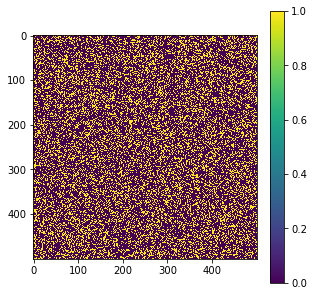

In [16]:
# generate a random starting array
# percentage of pixels that start off 'alive'
alive_pct = 0.3
field_size = 500
# build random array
field = np.random.uniform(low=0.0, high=1.0,size = [field_size,field_size]) < alive_pct

# display array 
plt.figure(figsize = (5,5))
plt.imshow(field, interpolation='none')
plt.colorbar()

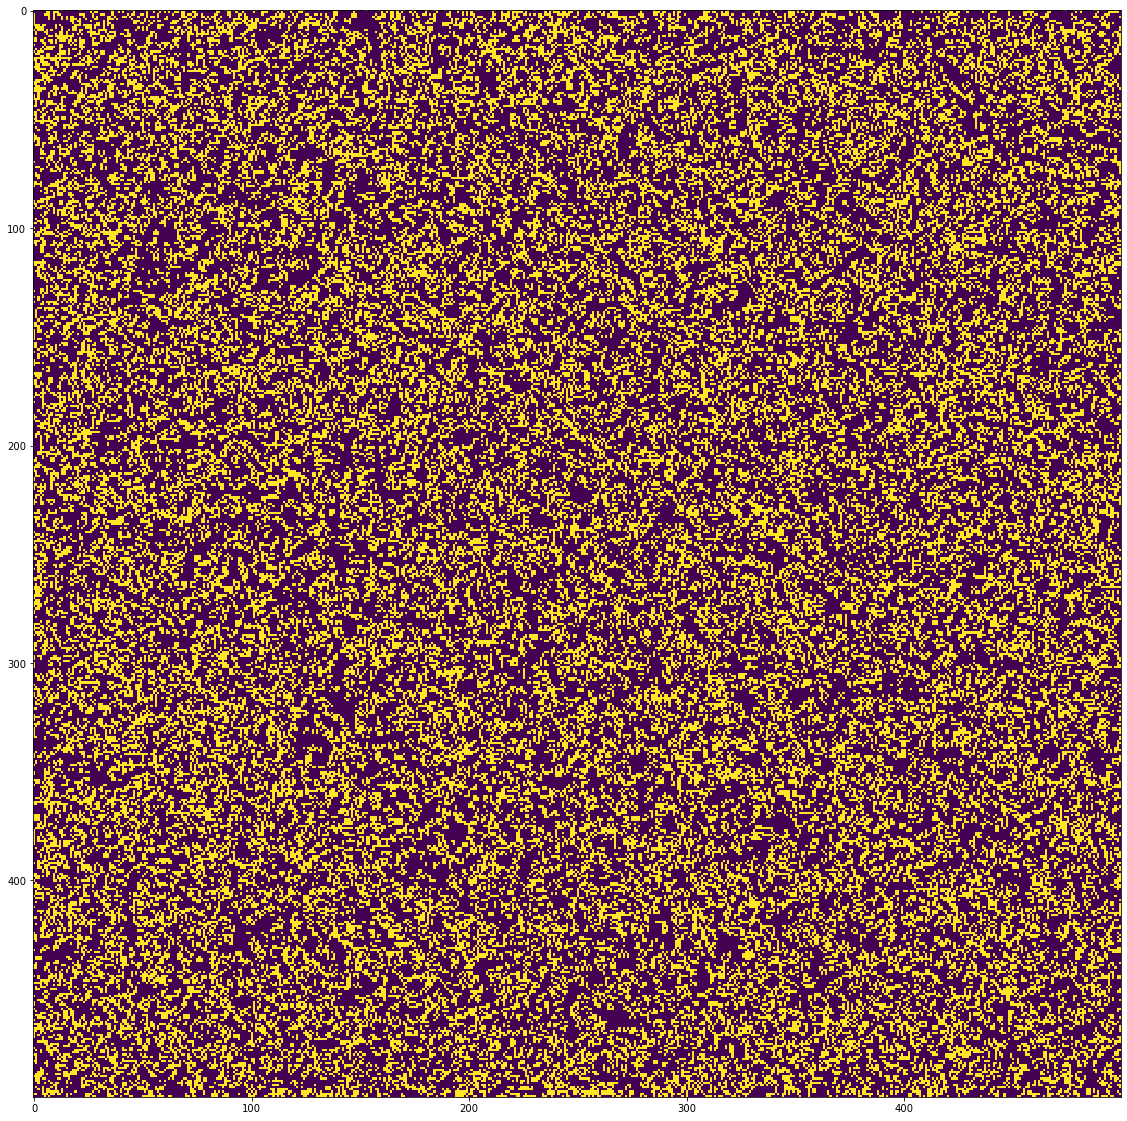

In [113]:
for i in range(0,1):
    clear_output(wait=True)
    field,neighbor_count = count_arround(field)
    plt.figure(figsize = (20,20))
    plt.imshow(field, interpolation='none')
    plt.show()


In [78]:
%%time
for i in range(0,80):
    field = count_arround(field)

CPU times: user 819 ms, sys: 68.8 ms, total: 887 ms
Wall time: 892 ms


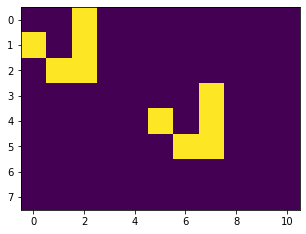

In [27]:
gliders = np.array([[0,0,1,0,0,0,0,0,0,0,0],
                  [1,0,1,0,0,0,0,0,0,0,0],
                  [0,1,1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,1,0,1,0,0,0],
                  [0,0,0,0,0,0,1,1,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0]])
                  
         
plt.figure(figsize = (5,5))
plt.imshow(field, interpolation='none')

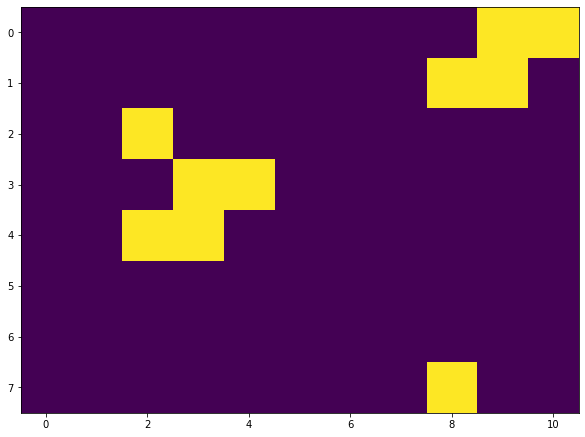

In [ ]:
for i in range(0,50):
    clear_output(wait=True)
    gliders = count_arround(gliders)
    plt.figure(figsize = (10,10))
    plt.imshow(gliders, interpolation='none')
    plt.show()